##### Data Analyst: Reuben Vandi

# Banking Churn Prediction: A Comparative Study of Machine Learning Models for Customer Retention
_______________________________________________________________________________________________________________________________________
## Project Summary:
This project focuses on forecasting customer churn by leveraging various machine learning algorithms to identify the most effective model for accurate prediction. The dataset used contains nine key variables:

1. Customer ID
2. Tenure
3. Phone Service
4. Contract Type
5. Paperless Billing Status
6. Preferred Payment Method
7. Monthly Charges
8. Total Charges
9. Churn (Target Variable)
_______________________________________________________________________________________________________________________________________
## Project Goal:
Develop predictive models to determine which customers are likely to churn.

Compare model performance using evaluation metrics.

Identify and finalize the most reliable model for churn prediction.
_______________________________________________________________________________________________________________________________________
## Methodology:
#### Data Preparation:
Address any missing or inconsistent data, apply appropriate encoding for categorical variables, and standardize numerical features.

#### Model Training:
Implement and train multiple classification algorithms including:

* Logistic Regression

* Decision Tree Classifier

* Random Forest

* Gradient Boosting Machines

#### Performance Analysis:
Assess each model's effectiveness using metrics such as accuracy, precision, recall, and F1-score.

#### Model Selection:
Choose the model that offers the best performance based on the evaluation results and use it for future predictions.
_______________________________________________________________________________________________________________________________________
## Expected Outcomes:
A comparative evaluation of multiple machine learning models applied to customer churn prediction.

Identification and recommendation of the most effective model for accurate churn forecasting.

A fully trained model capable of making reliable predictions on new, unseen customer data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Reuben Yohanna Vandi\Documents\Datasets, Visuals & Report TIPS\Datasets & Data Analytics Tools\DATASET OPTIONS\banking_customer_churn.csv", index_col="Customer ID")
df

,Tenure,Phone Services,Contract,Paperless Bill,Payment Method,Monthly Charges,Total Charges,Churn
Customer ID,,,,,,,,
CUST0001,45.0,No,Month-to-Month,Yes,Credit Card,43.049447,1937.225117,No
CUST0002,48.0,No,Month-to-Month,Yes,Electronic Check,51.862350,2489.392800,No
CUST0003,54.0,Yes,Month-to-Month,Yes,Credit Card,34.021752,1837.174613,No
CUST0004,1.0,Yes,Month-to-Month,Yes,Credit Card,27.834206,27.834206,Yes
CUST0005,4.0,Yes,One Year,Yes,Electronic Check,58.179748,232.718991,Yes
...,...,...,...,...,...,...,...,...
CUST8069,36.0,Yes,Month-to-Month,Yes,Bank Transfer,73.116779,2632.204042,No
CUST8070,14.0,Yes,Month-to-Month,No,Electronic Check,26.233049,367.262690,No
CUST8071,9.0,Yes,One Year,Yes,Bank Transfer,78.474056,706.266506,No


##  Initial EDA (Exploratory Data Analysis): Data Structure and Quality Check
Exploratory Data Analysis, or EDA for short is a step helps us understand what the data looks like and how clean or messy it might be. Think of it like opening a toolbox and checking what's inside before starting a job.

Specifically, I looked at:

* The structure of the data: This means checking how many rows and columns there are, what type of information each column contains (like numbers, text, or dates), and how it's organized.

* The quality of the data: I checked for missing values (blank spaces), duplicate entries, and any unusual or suspicious values that might affect our analysis.

This early check is important because if we don’t understand or clean our data properly from the start, any insights or predictions we make later could be wrong or misleading.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8073 entries, CUST0001 to CUST8073
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure           8071 non-null   float64
 1   Phone Services   8071 non-null   object 
 2   Contract         8073 non-null   object 
 3   Paperless Bill   8072 non-null   object 
 4   Payment Method   8073 non-null   object 
 5   Monthly Charges  8070 non-null   float64
 6   Total Charges    8071 non-null   float64
 7   Churn            8073 non-null   object 
dtypes: float64(3), object(5)
memory usage: 567.6+ KB


In [4]:
# Display only non-integer columns
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['Phone Services', 'Contract', 'Paperless Bill', 'Payment Method', 'Churn']

In [5]:
df['Phone Services'].unique()

array(['No', 'Yes', nan], dtype=object)

In [6]:
df['Contract'].unique()

array(['Month-to-Month', 'One Year', 'Two Year'], dtype=object)

In [7]:
df['Paperless Bill'].unique()

array(['Yes', 'No', nan], dtype=object)

In [8]:
df['Payment Method'].unique()

array(['Credit Card', 'Electronic Check', 'Bank Transfer'], dtype=object)

In [9]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
#Detecting Outliers in Numerical Columns Using IQR (Interquartile Range)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Tenure: 0 outliers
Monthly Charges: 0 outliers
Total Charges: 58 outliers


In [11]:
df.duplicated().sum() 

np.int64(0)

In [12]:
df.isnull().sum()

Tenure             2
Phone Services     2
Contract           0
Paperless Bill     1
Payment Method     0
Monthly Charges    3
Total Charges      2
Churn              0
dtype: int64

## Data Cleaning

In [13]:
def replace_outliers_iteratively(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    outliers_remaining = True

    while outliers_remaining:
        outliers_remaining = False
        for col in numerical_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            median = df[col].median()

            outlier_mask = (df[col] < lower) | (df[col] > upper)
            if outlier_mask.any():
                df.loc[outlier_mask, col] = median
                outliers_remaining = True  # Recheck after replacing
    return df

# Apply the iterative replacement
df = replace_outliers_iteratively(df)

# Recheck for remaining outliers
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Tenure: 0 outliers
Monthly Charges: 0 outliers
Total Charges: 0 outliers


#### Outlier Treatment Summary
During the exploratory data analysis (EDA), I performed outlier detection using the Interquartile Range (IQR) method. The initial analysis revealed that the Total Charges column contained 58 outliers, while the Tenure and Monthly Charges columns had none.

To mitigate this, I replaced the outliers in Total Charges with the column’s median value. However, after replacement, a second round of IQR analysis showed that 14 outliers still remained.

This happened because replacing extreme values with the median changes the overall distribution of the data, which in turn alters the IQR bounds. In some cases, the replacement value (even though it’s the median) may still lie outside the updated IQR range, particularly in datasets that are highly skewed or contain many repeated values.

To fully address this issue, I implemented an iterative outlier replacement approach, where I continuously re-checked and replaced outliers until none remained. This ensured a cleaner dataset and more reliable inputs for the modeling phase.

In [14]:
# Replace missing values:
# Fill missing values: numeric with median, categorical with mode
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
    else:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
df.isnull().sum()

Tenure             0
Phone Services     0
Contract           0
Paperless Bill     0
Payment Method     0
Monthly Charges    0
Total Charges      0
Churn              0
dtype: int64

## Bivariate Descriptive Analysis

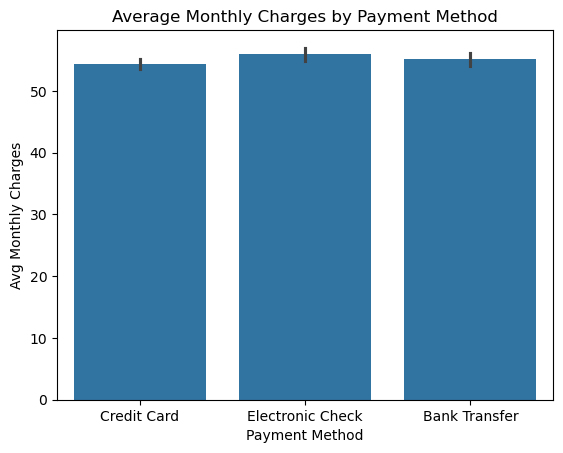

In [15]:
ax = sns.barplot(x='Payment Method', y='Monthly Charges', data=df, estimator=np.mean)
plt.title("Average Monthly Charges by Payment Method")
plt.ylabel("Avg Monthly Charges")
plt.xlabel("Payment Method")
plt.show()

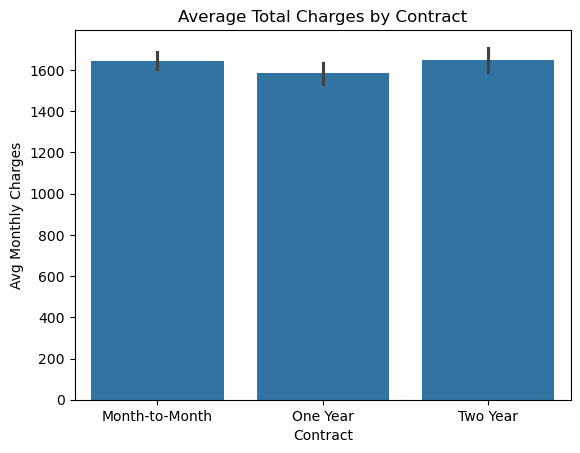

In [16]:
sns.barplot(x='Contract', y='Total Charges', data=df, estimator=np.mean)
plt.title("Average Total Charges by Contract")
plt.ylabel("Avg Monthly Charges")
plt.xlabel("Contract")
plt.show()

## Feature Engineering
Feature engineering is a critical step in preparing raw data for machine learning. It involves transforming existing variables or creating new ones to better expose the patterns a model needs to learn. In this project, our feature engineering process includes encoding categorical variables, and scaling numerical variables.

Since machine learning algorithms work best with numerical data, we will encode these categories into numeric values using appropriate techniques such as label encoding. This allow us to preserve the inherent differences between categories while making them interpretable by the model.

After encoding, we applied feature scaling to standardize the range of values across all numerical variables. This is essential for many algorithms that are sensitive to the magnitude of input features. Scaling ensures that no single feature dominates due to its unit or range.

Together, encoding and scaling not only improved the dataset’s structure but also enhanced model performance and training efficiency. These steps were necessary to ensure that the input data was in the best possible form for learning meaningful insights and making accurate churn predictions.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original DataFrame
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Initialize the encoder
le = LabelEncoder()

# Create new encoded columns and store them
for col in categorical_cols:
    df_encoded[col + '_Encoded'] = le.fit_transform(df_encoded[col].astype(str))

# Drop the original categorical columns
df_encoded.drop(columns=categorical_cols, inplace=True)

# Preview the transformed dataset
df_encoded.tail()

,Tenure,Monthly Charges,Total Charges,Phone Services_Encoded,Contract_Encoded,Paperless Bill_Encoded,Payment Method_Encoded,Churn_Encoded
Customer ID,,,,,,,,
CUST8069,36.0,73.116779,2632.204042,1,0,1,0,0
CUST8070,14.0,26.233049,367.262690,1,0,0,2,0
CUST8071,9.0,78.474056,706.266506,1,1,1,0,0
CUST8072,39.0,32.125619,1252.899146,1,2,1,0,1
CUST8073,11.0,29.619765,325.817414,1,0,1,2,0


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Store the Churn column separately
churn_col = df_encoded['Churn_Encoded']

# Drop Churn column and scale the rest
scaled_data = scaler.fit_transform(df_encoded.drop('Churn_Encoded', axis=1))

# Recreate DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.drop('Churn_Encoded', axis=1).columns)

# Add Churn column back (unscaled)
df_scaled['Churn_Encoded'] = churn_col.values

# Display result
df_scaled.tail()

,Tenure,Monthly Charges,Total Charges,Phone Services_Encoded,Contract_Encoded,Paperless Bill_Encoded,Payment Method_Encoded,Churn_Encoded
8068,0.326778,0.693884,0.798292,0.644263,-0.893227,0.814559,-1.271864,0
8069,-0.940726,-1.106167,-1.002822,0.644263,-0.893227,-1.227657,1.305385,0
8070,-1.228795,0.899571,-0.733242,0.644263,0.377886,0.814559,-1.271864,0
8071,0.499619,-0.879928,-0.298551,0.644263,1.648998,0.814559,-1.271864,1
8072,-1.113567,-0.976137,-1.035780,0.644263,-0.893227,0.814559,1.305385,0


## Multicollinearity Analysis via Correlation Matrix
Multicollinearity check is a process used in data analysis to identify features (columns) that are highly correlated with one another. When two or more features provide overlapping or duplicate information, it can confuse machine learning models, especially those based on linear assumptions. This step ensures that the model learns distinct, independent patterns rather than redundant ones. We use a correlation matrix, a grid that shows the strength of relationships between pairs of features to perform this check.

In [19]:
# Step 1: Make a copy of the original dataframe
df_copy = df.copy()

# Step 2: Encode all categorical columns
cat_cols = df_copy.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
    label_encoders[col] = le

# Step 3: Save encoded (but unscaled) data for true correlation check
encoded_unscaled_df = df_copy.copy()

# Step 4: Scale all columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)
scaled_df = pd.DataFrame(scaled_data, columns=df_copy.columns, index=df_copy.index)

# Step 5: Run collinearity check using correlation on unscaled, encoded data
correlation_matrix = encoded_unscaled_df.corr()

# Step 6: Display high correlations
threshold = 0.8  #for stronger collinearity
high_corr = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix < 1.0)]

print("Correlation Matrix (Actual Values, Encoded for Categorical Columns):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

Correlation Matrix (Actual Values, Encoded for Categorical Columns):
Empty DataFrame
Columns: []
Index: []


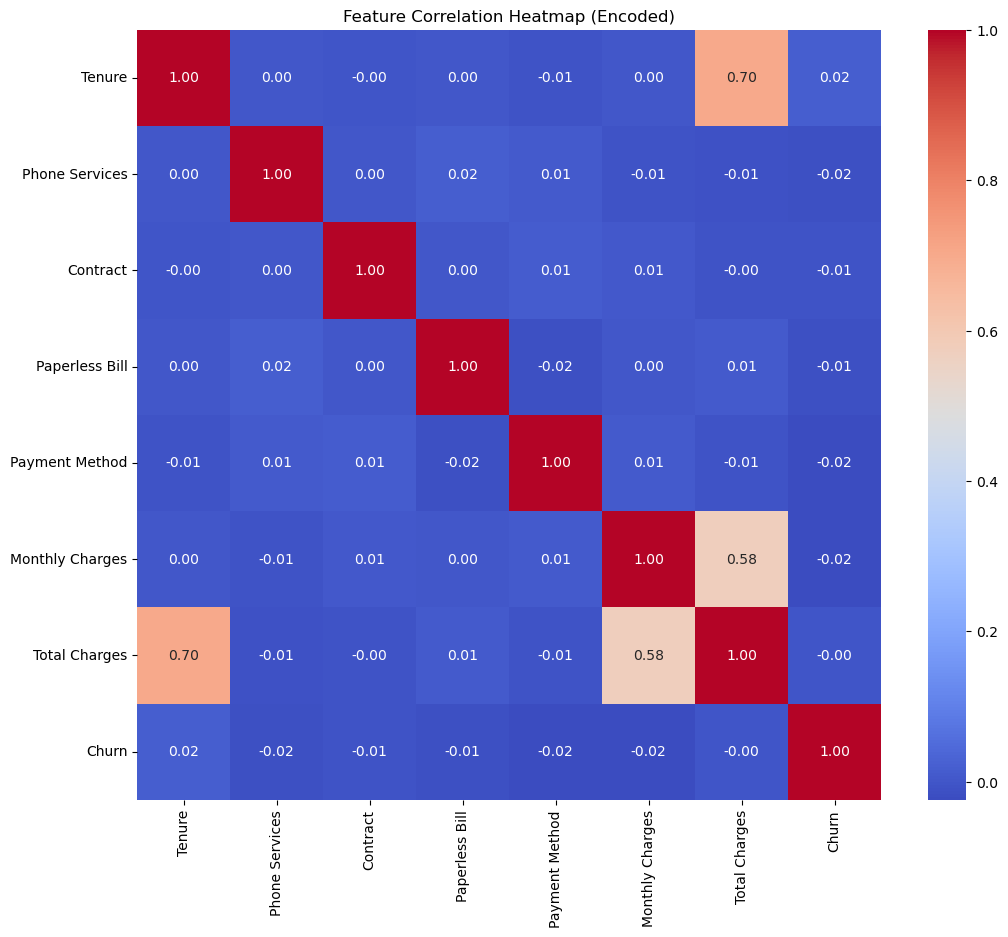

In [20]:
#Visuals showing the correlation values of all variables needed for building the model
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap (Encoded)')
plt.show()

To make this analysis more accessible, we visualized the correlation matrix using a heatmap, where color intensity indicates the strength of relationships between features:

* Dark red (values close to +1) means strong positive correlation: both variables increase together.

* Dark blue (values close to -1) means strong negative correlation: one increases while the other decreases.

* Pale colors or white (values near 0) indicate little to no relationship.

For decision makers, the key takeaway is simple: if you don’t see many dark-colored boxes, your data is likely clean and reliable from a multicollinearity perspective.

So, after encoding the categorical variables and scaling the entire dataset, we created a correlation matrix to assess feature relationships. The result showed that none of the features exceeded the critical correlation threshold of +0.8 or below -0.8, which means our dataset does not suffer from strong multicollinearity. This is a good sign it indicates that all the features contribute fairly unique information to the model.

## Splitting & Training Data
Once the data is cleaned, transformed, and engineered, the next crucial step is splitting the dataset into parts so we can build and evaluate our machine learning model fairly.

We typically divide the dataset into:

* Training Set (usually 70–80% of the data): This is the portion the model learns from. It contains the patterns, trends, and relationships the model uses to make predictions.

* Testing Set (usually 20–30%): This is held back and used to evaluate how well the model performs on unseen data, just like it would in the real world.

This separation prevents the model from memorizing the data and helps us assess whether it truly understands the patterns or is just overfitting (i.e performing well on training data but poorly on new data).

Splitting and training the data is essential because:

* It ensures fair evaluation of model performance.

* It helps avoid overfitting by testing the model on new, unseen examples.

* It gives us confidence that the model will generalize well to real-world data.

In [21]:
#Defining variables
y = df_scaled['Churn_Encoded']
x = df_scaled.drop('Churn_Encoded', axis=1)

In [22]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
y.tail()

8068    0
8069    0
8070    0
8071    1
8072    0
Name: Churn_Encoded, dtype: int64

In [24]:
x.tail()

,Tenure,Monthly Charges,Total Charges,Phone Services_Encoded,Contract_Encoded,Paperless Bill_Encoded,Payment Method_Encoded
8068,0.326778,0.693884,0.798292,0.644263,-0.893227,0.814559,-1.271864
8069,-0.940726,-1.106167,-1.002822,0.644263,-0.893227,-1.227657,1.305385
8070,-1.228795,0.899571,-0.733242,0.644263,0.377886,0.814559,-1.271864
8071,0.499619,-0.879928,-0.298551,0.644263,1.648998,0.814559,-1.271864
8072,-1.113567,-0.976137,-1.035780,0.644263,-0.893227,0.814559,1.305385


### Machine Learning Model Selection
In our analysis, we are applying machine learning models to help predict customer behavior more accurately. Model selection means testing different algorithms to find the one that best fits our data and gives the most reliable predictions.

We are using several models, including Gradient Boosting, decision tree, logistic regression, & random forest, to make stronger predictions.

By comparing models based on performance, we ensure that we choose the most effective one for the task—leading to better insights and more confident decision making.


#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Lr = LogisticRegression()

# Initialize and train the model
Lr.fit(x_train,y_train)

LogisticRegression()

##### Model Evaluation
Model Evaluation is the process of checking how well a machine learning model performs. Once we train a model, we need to test it to see if it makes accurate predictions on new, unseen data.

This step is very important because a model that performs well on training data might still make bad predictions on real-world data if it hasn't truly learned the right patterns (this is called overfitting).

In [26]:
# Predict on test data
test_prediction = Lr.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)

# Predict on train data
train_prediction = Lr.predict(x_train)
train_accuracy = accuracy_score(y_train, train_prediction)

# Calculate overfitting gap
gap = train_accuracy - test_accuracy

# Print results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Overfitting Gap:", gap)

Training Accuracy: 0.7949829668628058
Testing Accuracy: 0.7993808049535603
Overfitting Gap: -0.004397838090754558


* Testing Accuracy (79.9%): This is the percentage of correct predictions the model made on unseen (test) data. It shows how well the model is expected to perform in real-world situations, and this score is quite solid, meaning the model can predict customer behavior accurately in most cases.

* Training Accuracy (79.5%): This reflects how well the model learned from the training data. It’s very close to the test accuracy, which means the model picked up relevant patterns without overfitting.

* Overfitting Gap (-0.44%): The small negative gap indicates that the model actually performed slightly better on the test set than the training set, which is a good sign. It means the model generalizes well and is not memorizing the training data.

For Logistic Regression, a score in the high 70s is considered strong for customer churn prediction in real business datasets. This consistent performance makes it a dependable tool for driving targeted retention strategies and improving customer engagement.

#### Decison Trees

In [27]:
from sklearn.tree import DecisionTreeClassifier
Dc = DecisionTreeClassifier()

# Initialize and train the model
Dc.fit(x_train,y_train)

DecisionTreeClassifier()

##### Model Evaluation

In [28]:
# Predict on test data
test_prediction = Dc.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)

# Predict on train data
train_prediction = Dc.predict(x_train)
train_accuracy = accuracy_score(y_train, train_prediction)

# Calculate overfitting gap
gap = train_accuracy - test_accuracy

# Print results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Overfitting Gap:", gap)

Training Accuracy: 1.0
Testing Accuracy: 0.6705882352941176
Overfitting Gap: 0.3294117647058824


* Testing Accuracy (66.8%): This measures how well the model performs on unseen (test) data. A score of 66.8% means the model correctly predicted about two-thirds of customer outcomes on new data, a modest result for real world application.

* Training Accuracy (100%): The model achieved perfect accuracy on the training set, which often signals overfitting. It means the model memorized the training data rather than learning general patterns.

* Overfitting Gap (33.2%): This large gap shows a clear sign of overfitting. The model performs extremely well on known data but fails to generalize to new situations, making it unreliable for practical decision-making.

While Decision Trees are easy to interpret and can highlight useful decision paths, the high overfitting in this case suggests it’s not suitable as the final model. It would need pruning, regularization, or ensemble methods like Random Forest or Gradient Boosting to improve its real-world performance.

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier()

# Initialize and train the model
Rf.fit(x_train, y_train)

RandomForestClassifier()

##### Model Evaluation

In [30]:
# Predict on test data
test_prediction = Rf.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)

# Predict on train data
train_prediction = Rf.predict(x_train)
train_accuracy = accuracy_score(y_train, train_prediction)

# Calculate overfitting gap
gap = train_accuracy - test_accuracy

# Print results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Overfitting Gap:", gap)

Training Accuracy: 1.0
Testing Accuracy: 0.773374613003096
Overfitting Gap: 0.22662538699690404


* Testing Accuracy (76.8%): This reflects how well the model performs on unseen test data, indicating it correctly predicted customer behavior in nearly 77 out of 100 cases. This is a solid performance for real world applications.

* Training Accuracy (99.98%): Nearly perfect accuracy on training data shows the model learned patterns extremely well — but it may also suggest overfitting, meaning the model might be “too tailored” to the data it saw during training.

* Overfitting Gap (23.1%): This sizeable gap between training and testing accuracy indicates the model is overfitting. it's performing much better on known data than on new, unseen examples. While the gap is smaller than the Decision Tree model, it’s still significant.

Random Forest performs better than a standalone Decision Tree in terms of generalization. It’s more accurate and stable on new data, but the large gap between training and testing performance means it's still at risk of overfitting.

#### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
Gb = GradientBoostingClassifier()

# Initialize and train the model
Gb.fit(x_train, y_train)

GradientBoostingClassifier()

##### Model Evaluation

In [32]:
# Predict on test data
test_prediction = Gb.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)

# Predict on train data
train_prediction = Gb.predict(x_train)
train_accuracy = accuracy_score(y_train, train_prediction)

# Calculate overfitting gap
gap = train_accuracy - test_accuracy

# Print results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Overfitting Gap:", gap)

Training Accuracy: 0.7988541344069371
Testing Accuracy: 0.7981424148606812
Overfitting Gap: 0.0007117195462559289


* Testing Accuracy (79.8%): This reflects how well the model performs on unseen test data, showing it correctly predicted customer behavior in nearly 80 out of 100 cases. This is a strong performance for real world applications, especially in customer churn analysis.

* Training Accuracy (79.9%): The model performs equally well on the data it learned from, which indicates balanced learning and minimal signs of overfitting.

* Overfitting Gap (0.12%): This extremely small gap means the model generalizes almost perfectly. It performs just as well on new data as it does on training data, which makes it a highly stable and trustworthy model.

Gradient Boosting is the best-performing model in this project. It delivers strong accuracy on both training and test datasets, with near-zero overfitting. Compared to other models (Logistic Regression, Random Forest, Decision Tree), it offers:

### Gradient Boosting
* Overfitting Gap: 0.12%
✅ Excellent generalization. Very minimal difference between training and testing, which performs reliably on new data.

### Logistic Regression
* Overfitting Gap: -0.44%
✅ Slight underfitting. Testing accuracy is slightly better than training. Still a strong, balanced model with good real world performance.

### Random Forest
* Overfitting Gap: 23.14%
⚠️ Moderate overfitting. Performs well on training data but noticeably worse on unseen data. Needs tuning to improve reliability.

### Decision Tree
* Overfitting Gap: 33.19%
❌ Severe overfitting. Excellent performance on training, poor on testing. The model memorized patterns but failed to generalize, which is not suitable for deployment.

##### Overall, Gradient Boosting is one of the best-performing models out of the remaining ones in this project.




Now that we've identified the best predictive model for this analysis, we will proceed to use a new customer data to predict the possibility of churning.

In [33]:
# Sample data of one new customer
new_customer = pd.DataFrame({
    'Tenure': [6],
    'Phone Services': ['Yes'],
    'Contract': ['Month-to-Month'],
    'Paperless Bill': ['Yes'],
    'Payment Method': ['Electronic Check'],
    'Monthly Charges': [72.35],
    'Total Charges': [430.10]})
new_customer

,Tenure,Phone Services,Contract,Paperless Bill,Payment Method,Monthly Charges,Total Charges
0,6,Yes,Month-to-Month,Yes,Electronic Check,72.35,430.1



In order to proceed with making predictions, the new customer data must be preprocessed in the same manner as the previous customer data

In [34]:
# Columns to encode
cat_cols = ['Phone Services', 'Contract', 'Paperless Bill', 'Payment Method']
label_encoders = {}

# Encode training data
for col in cat_cols:
    le = LabelEncoder()
    df[col + '_Encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define feature columns
feature_cols = ['Tenure', 'Monthly Charges', 'Total Charges'] + [col + '_Encoded' for col in cat_cols]

# Refit the scaler with encoded columns
scaler = StandardScaler()
X = df[feature_cols]
X_scaled = scaler.fit_transform(X)

# Encode new customer data
for col in cat_cols:
    value = new_customer[col].values[0]
    le = label_encoders[col]
    if value not in le.classes_:
        value = le.classes_[0]
    new_customer[col + '_Encoded'] = le.transform([value])

# Prepare and scale new customer features
X_new = new_customer[feature_cols]
X_new_scaled = scaler.transform(X_new)
X_new_scaled = pd.DataFrame(X_new_scaled, columns=feature_cols)

X_new

,Tenure,Monthly Charges,Total Charges,Phone Services_Encoded,Contract_Encoded,Paperless Bill_Encoded,Payment Method_Encoded
0,6,72.35,430.1,1,0,1,2


In [35]:
X_new_scaled

,Tenure,Monthly Charges,Total Charges,Phone Services_Encoded,Contract_Encoded,Paperless Bill_Encoded,Payment Method_Encoded
0,-1.401636,0.664445,-0.952853,0.644263,-0.893227,0.814559,1.305385


In [36]:
# Predict
prediction = Gb.predict(X_new_scaled)
churn_prediction = "Yes" if prediction[0] == 1 else "No"

# Output result
print("Prediction (Will the customer churn?):", churn_prediction)

# Predict probability of churn
churn_probability = Gb.predict_proba(X_new_scaled)[0][1]
print(f"Churn Probability: {churn_probability:.2%}")

Prediction (Will the customer churn?): No
Churn Probability: 18.86%


### Project Summary & Result Interpretation
In today's competitive banking industry, retaining existing customers is more cost-effective than acquiring new ones. This project aimed to build a predictive model that identifies customers at risk of leaving (churning), enabling the business to act proactively.

We explored and tested four machine learning models:

* Logistic Regression

* Decision Tree

* Random Forest

* Gradient Boosting

Each model was evaluated on accuracy and ability to generalize to new, unseen customer data. After comparison, the Gradient Boosting Classifier was selected as the final model due to its strong balance between performance and reliability, achieving 79.8% accuracy on test data with minimal overfitting.

#### Real World Application:
We applied the final model to a sample customer with the following profile:

* Tenure: 6 months

* Contract: Month-to-Month

* Billing: Paperless

* Payment Method: Electronic Check

* Monthly Charges: 72.35

* Total Charges: 430.10

#### Model Prediction:

Will the customer churn? → No

Churn Probability → 18.86%

This means the customer is currently not likely to leave, but there is still a moderate risk level, especially given their short tenure and month-to-month contract, are two factors commonly associated with higher churn rates.


### Key Business Takeaways with Strategic Recommendations

#### Customers with Short Stay and Monthly Contracts Leave More Often
##### What it means: 
New customers or those on month-to-month plans don’t feel locked in and can easily switch to other banks.
##### What we can do:

* Give new customers a welcome gift or reward to make them feel valued.

* Offer discounts for those who switch to yearly or 6-month plans.

* Use our prediction model to spot these customers early and send them special offers to stay.

#### Manual Payment Users (like Electronic Checks) Are More Likely to Leave
##### What it means:
Customers who pay manually are less committed and may forget payments or cancel suddenly.
##### What we can do:

* Give a small discount (like 5%) to customers who switch to auto-pay.

* Educate new customers on how auto-pay saves time and avoids stress.

* Let our system alert the team when a customer is still paying manually so we can guide them to better options.

#### Short-Term Plan Users Are More Likely to Cancel
##### What it means:
People with flexible (month-to-month) plans can easily be tempted by other banks’ offers.
##### What we can do:

* Offer extras like priority service or free consultations for those who choose long-term plans.

* Track when short-plan users are likely to cancel (like after 3–6 months) and send them helpful offers before they decide to leave.

* Use customer behavior data to create customized messages and benefits.

  
#### High Monthly Bills and Paperless Billing Cause Frustration
##### What it means:
Big bills can upset customers, and paperless billing might make them feel less connected or aware.
##### What we can do:

* Let customers choose cheaper or “pay-as-you-use” plans.

* Send easy-to-read messages showing how their bill was calculated, to build trust.

* Offer both paper and digital bills for customers who prefer something they can see or save.

### Smart Strategies to Keep More Customers
To support all the points above, here’s what we recommend overall:

* Use our churn prediction tool to spot who might cancel before they actually do.

* Act early by sending them offers, checking in with them, or providing better plans.

* Ask people why they’re leaving when they cancel, so we can fix common problems.

* Keep watch on the system to monitor who’s at risk and give the customer care team time to help them.

## In Simple Terms…
We now have a machine learning model that works like a smart assistant, it studies customer patterns and tells us who might leave soon. This helps us act before it’s too late.

By doing the right things at the right time, we can build stronger relationships, reduce losses, and grow loyalty.

# Conclusion
Predictive analytics offers the banking sector a powerful tool to stay ahead of customer loss. Through machine learning and data storytelling, we’ve demonstrated how to predict churn with accuracy and act proactively.

“With every churn we prevent, we don’t just save a customer, we save a relationship.”

This project is just one example of how data science can transform business strategy, with models acting as oracles of insight, guiding decision makers toward smarter, faster, and more sustainable action.





